# 数据挖掘-预测贷款用户是否逾期
## Task4：模型评估（2天）

------
### 1&emsp;划分数据集

 - 导入宏包

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import matplotlib as mpl
mpl.rcParams['font.sans-serif']=[u'SimHei']
mpl.rcParams['axes.unicode_minus']=False

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_column', 100)
pd.set_option('display.max_colwidth', 50)
pd.set_option('display.float_format',lambda x : '%.5f' % x)

 - 导入数据

In [2]:
data = pd.read_csv('./data/data_clean.csv', encoding='gbk')
Y = data['status']
X = data.drop(['status'], axis=1)

 - 划分数据集

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2018)

 - SMOTE上采样

In [29]:
from imblearn.over_sampling import SMOTE
x_train_smote, y_train_smote = SMOTE(random_state=2018).fit_sample(x_train, y_train)

------
### 2&emsp;模型评价

### 2.1 生成评价函数

In [23]:
def Eva(d,ls):
    t = np.sum(d[:,3])
    f = d.shape[0] - t

    TP = 1
    TN = f
    FP = 0
    FN = t-1

    TPR = [1/t]
    FPR = [0]
    AUC = 0
    
    P = [1]
    R = [1 / t]
    l = [1 - 1 / t]
    
    m = 1

    for i in range(1, d.shape[0]):
        if d[i,3] == 1:
            TP = TP+1
            FN = FN-1

        if d[i,3] == 0:
            FP = FP+1
            TN = TN-1

        TPR.append(TP/(TP+FN))
        FPR.append(FP/(TN+FP))
        AUC = AUC+0.5*((FPR[i]-FPR[i-1])*(TPR[i]+TPR[i-1]))
        
        P.append(TP / (TP + FP))
        R.append(TP / (TP + FN))
        l.append(np.abs(P[i] - R[i]))
        
        if ((TP+TN)/d.shape[0] == ls) & (m == 1):
            m = 0
            print("AC = {:.3f}".format(ls))
            print("P = {:.3f}".format(P[-1]))
            print("R = {:.3f}".format(R[-1]))
            
    
    x = np.linspace(0, 1)
    y = np.linspace(0, 1)
    
    plt.figure()
    plt.plot(R, P)
    plt.plot(x, y)  
    l_min = l.index(min(l))
    plt.plot(P[l_min], R[l_min], 'ro')
    plt.title('P-R 曲线')
    
    plt.figure()
    plt.plot(FPR,TPR)
    plt.plot(x, y, '--')
    plt.title('ROC 曲线')
    
    print("F1 = {:.3f}".format(2 * P[l_min] * R[l_min] / (P[l_min] + R[l_min])))
    print("AUC = {:.3f}".format(AUC))

### 2.2 模型训练

 - 逻辑回归

In [30]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train_smote, y_train_smote)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

训练集得分

AC = 0.771
P = 0.779
R = 0.756
F1 = 0.774
AUC = 0.846


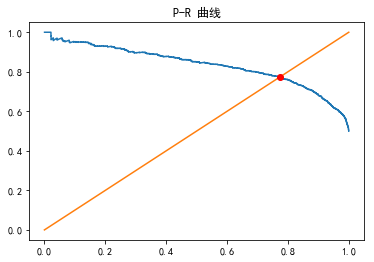

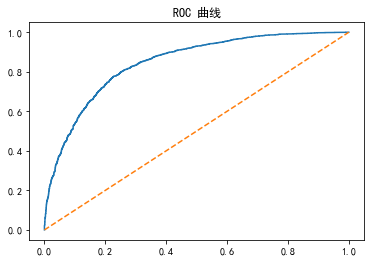

In [26]:
# train_set score
y_proba = LR.predict_proba(x_train_smote)
y_predi = LR.predict(x_train_smote)
d = np.vstack((y_proba.T[0].T, y_proba.T[1].T, y_predi, y_train_smote.T)).T
d = d[d[:,0].argsort()]
Eva(d,LR.score(x_train_smote, y_train_smote))

测试集得分

AC = 0.733
P = 0.494
R = 0.613
F1 = 0.519
AUC = 0.764


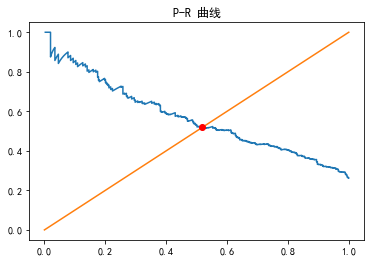

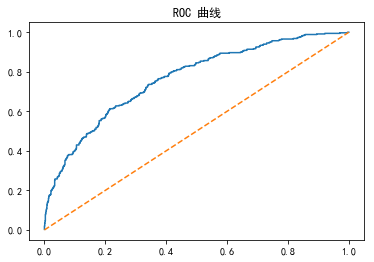

In [33]:
# test_set score
y_proba = LR.predict_proba(x_test)
y_predi = LR.predict(x_test)
d = np.vstack((y_proba.T[0].T, y_proba.T[1].T, y_predi, y_test.T)).T
d = d[d[:,0].argsort()]
Eva(d,LR.score(x_test, y_test))

 - 支持向量机

In [34]:
from sklearn import svm
SVM = svm.SVC(probability=True)
SVM.fit(x_train_smote, y_train_smote)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

训练集得分

AC = 1.000
P = 1.000
R = 1.000
F1 = 1.000
AUC = 1.000


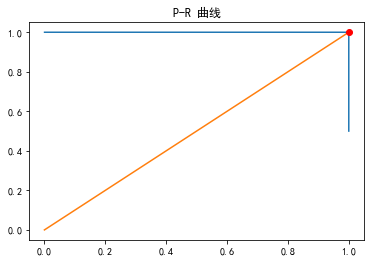

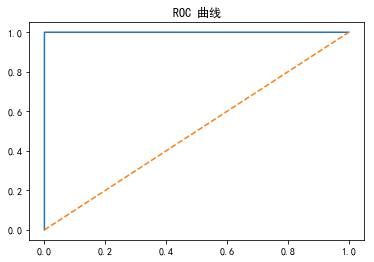

In [35]:
# train_set score
y_proba = SVM.predict_proba(x_train_smote)
y_predi = SVM.predict(x_train_smote)
d = np.vstack((y_proba.T[0].T, y_proba.T[1].T, y_predi, y_train_smote.T)).T
d = d[d[:,0].argsort()]
Eva(d, SVM.score(x_train_smote, y_train_smote))

 - 测试集得分

AC = 0.737
P = 0.500
R = 0.003
F1 = 0.252
AUC = 0.500


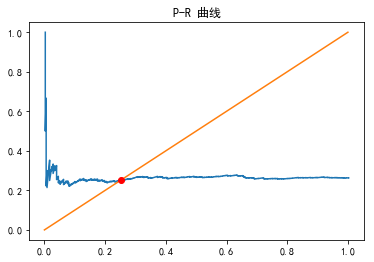

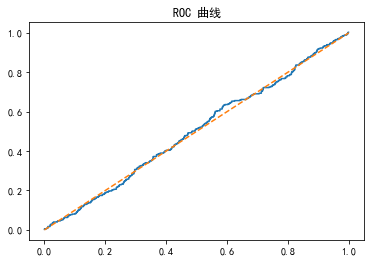

In [39]:
# test_set score
y_proba = SVM.predict_proba(x_test)
y_predi = SVM.predict(x_test)
d = np.vstack((y_proba.T[0].T, y_proba.T[1].T, y_predi, y_test.T)).T
d = d[d[:,0].argsort()]
Eva(d,SVM.score(x_test, y_test))

 - 决策树

In [53]:
from sklearn import tree
DTC = tree.DecisionTreeClassifier()
DTC.fit(x_train_smote, y_train_smote)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

训练集得分

AC = 1.000
P = 1.000
R = 1.000
F1 = 1.000
AUC = 1.000


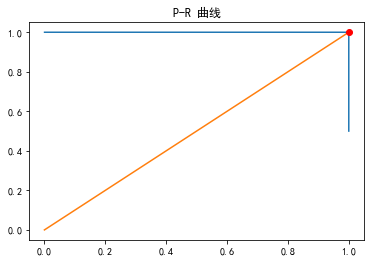

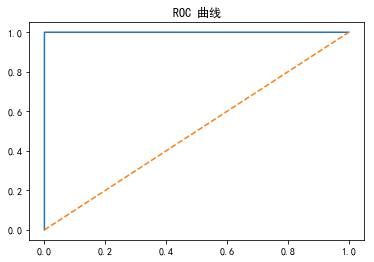

In [54]:
# train_set score
y_proba = DTC.predict_proba(x_train_smote)
y_predi = DTC.predict(x_train_smote)
d = np.vstack((y_proba.T[0].T, y_proba.T[1].T, y_predi, y_train_smote.T)).T
d = d[d[:,0].argsort()]
Eva(d, DTC.score(x_train_smote, y_train_smote))

 - 测试集得分

AC = 0.693
P = 0.420
R = 0.444
F1 = 0.427
AUC = 0.620


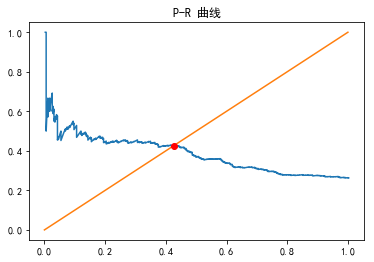

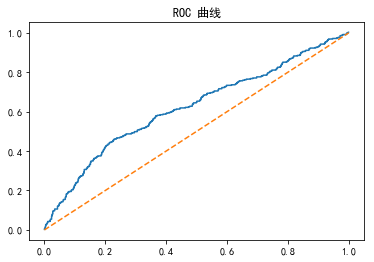

In [55]:
# test_set score
y_proba = DTC.predict_proba(x_test)
y_predi = DTC.predict(x_test)
d = np.vstack((y_proba.T[0].T, y_proba.T[1].T, y_predi, y_test.T)).T
d = d[d[:,0].argsort()]
Eva(d, DTC.score(x_test, y_test))

 - 随机森林

In [56]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train_smote, y_train_smote)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

训练集得分

AC = 0.990
P = 0.998
R = 0.983
F1 = 0.991
AUC = 1.000


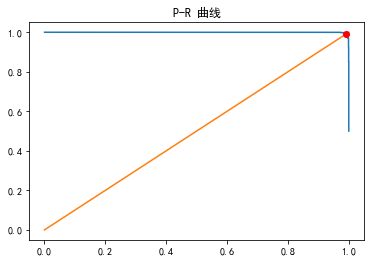

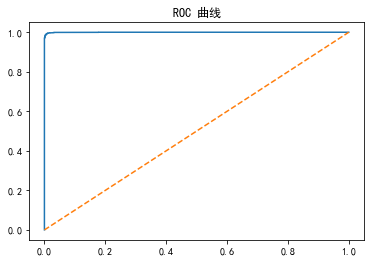

In [57]:
# train_set score
y_proba = RFC.predict_proba(x_train_smote)
y_predi = RFC.predict(x_train_smote)
d = np.vstack((y_proba.T[0].T, y_proba.T[1].T, y_predi, y_train_smote.T)).T
d = d[d[:,0].argsort()]
Eva(d, RFC.score(x_train_smote, y_train_smote))

测试集得分

AC = 0.748
P = 0.684
R = 0.074
F1 = 0.479
AUC = 0.733


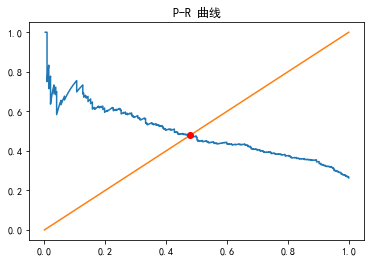

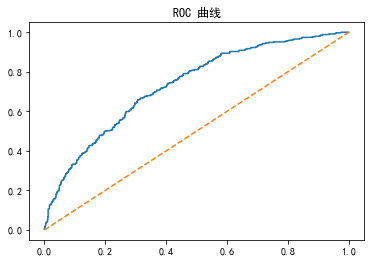

In [58]:
# test_set score
y_proba = RFC.predict_proba(x_test)
y_predi = RFC.predict(x_test)
d = np.vstack((y_proba.T[0].T, y_proba.T[1].T, y_predi, y_test.T)).T
d = d[d[:,0].argsort()]
Eva(d, RFC.score(x_test, y_test))

 - XGBoost

In [78]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

训练集得分

AC = 0.860
P = 0.862
R = 0.514
F1 = 0.732
AUC = 0.921


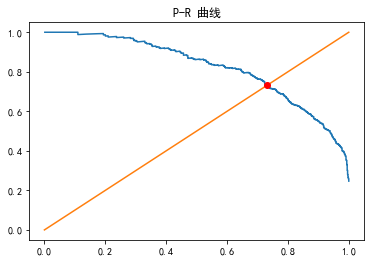

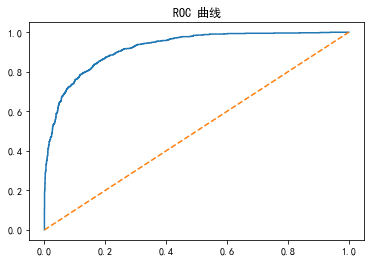

In [79]:
# train_set score
y_proba = XGB.predict_proba(x_train)
y_predi = XGB.predict(x_train)
d = np.vstack((y_proba.T[0].T, y_proba.T[1].T, y_predi, y_train.T)).T
d = d[d[:,0].argsort()]
Eva(d, XGB.score(x_train, y_train))

 - 测试集得分

AC = 0.784
P = 0.687
R = 0.327
F1 = 0.530
AUC = 0.784


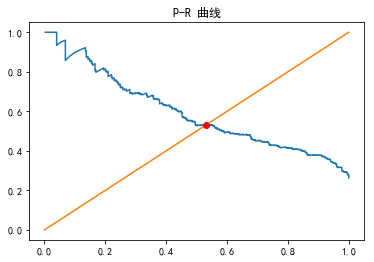

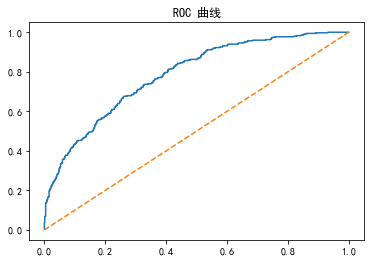

In [75]:
# test_set score
y_proba = XGB.predict_proba(x_test)
y_predi = XGB.predict(x_test)
d = np.vstack((y_proba.T[0].T, y_proba.T[1].T, y_predi, y_test.T)).T
d = d[d[:,0].argsort()]
Eva(d, XGB.score(x_test, y_test))